In [1]:
import time
import sys
import re
import os
sys.path.append('../')
sys.path.append('../SLASH/')
sys.path.append('../EinsumNetworks/src/')


#torch, numpy, ...
import torch
from torch.utils.tensorboard import SummaryWriter

import numpy as np
import importlib
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns

plt.style.use(["science", "grid"])  # Need SciencePlots pip package


matplotlib.rcParams.update(
    {
        "font.family": "serif",
        "text.usetex": False,
        "font.size": 16
    }
)


import utils


from slash import SLASH
from tqdm.notebook import tqdm

# Plot the average precision (AP) and the average loss (AL) for all seeds
## Additionaly, plot both for each seed separately

SLASH Attention CLEVR4 average precision overview: [85.39557470744779, 90.42129336491075, 73.59679437367417, 51.61760914012827, 58.482655632062205]
SLASH Attention CLEVR4 average precision mean+/-std: 71.90278544364465+/-14.96294373328245


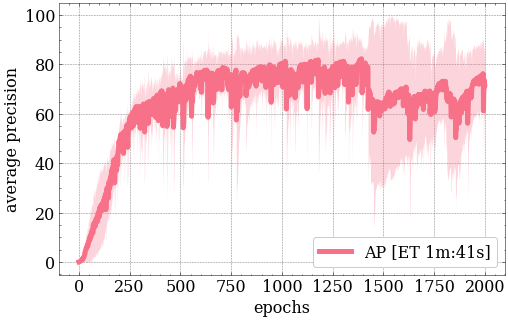

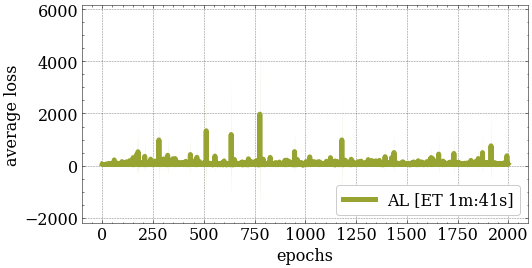

Begin with plotting for individual seeds...
All done!


In [52]:
# Firstly load the data from the trained models for both DPPLs
# and trasform the measurements of time and test accuracy to be ready to plot 
seeds = [1,2,3,4,5]

avg_precision_lists = []
avg_precision_overview = []
avg_loss_lists = []
avg_loss_overview = []
time_list = []
slash_results_path = os.path.join(os.getcwd(), 'data')
folders = [x for x in os.listdir(slash_results_path) if re.search(f'CLEVR4_seed_*', x)]
# print(len(folders))
for f in folders:
    model_path = os.path.join(slash_results_path, f, 'SLASH_Attention_CLEVR4.pt')
    model = torch.load(model_path)
    avg_precision_lists.append(np.array(model['test_ap_list'])[:,0]*100)
    avg_precision_overview.append(np.array(model['test_ap_list'])[-1,0]*100)
    avg_loss_lists.append(np.array(model['loss'])[:]*100)
    avg_loss_overview.append(np.array(model['loss'])[-1]*100)
    time = model['time'][0].split(':')    
    time = int(time[0].split(', ')[2][0]) * 60 + int(time[0].split(', ')[3][0:2])
    time_list.append(time)
average_epoch_time = np.average(time_list)
minutes = round(average_epoch_time // 60 % 60)
seconds = round(average_epoch_time % 60)
average_epoch_time = f"{minutes}m:{seconds}s"

# Determine and print the accuracy's overview
print(f'SLASH Attention CLEVR4 average precision overview: {avg_precision_overview}')
slash_overview_average = np.average(avg_precision_overview, axis=0)
slash_overview_std = np.std(avg_precision_overview, axis=0)
print(f'SLASH Attention CLEVR4 average precision mean+/-std: {slash_overview_average}+/-{slash_overview_std}')
avg_precision_average = np.average(avg_precision_lists, axis=0)
avg_precision_std = np.std(avg_precision_lists, axis=0)
avg_loss_average = np.average(avg_loss_lists, axis=0)
avg_loss_std = np.std(avg_loss_lists, axis=0)

# Average precision plot
clrs = sns.color_palette("husl", 4)
x = np.arange(0,2000)

fig1, axs1 = plt.subplots(figsize=(8,5))
axs1.plot(x, avg_precision_average, label=f'AP [ET {average_epoch_time}]', c=clrs[0], linewidth=5)
axs1.fill_between(x, 
                  avg_precision_average - avg_precision_std, 
                  avg_precision_average + avg_precision_std,
                  alpha=0.3, edgecolor=clrs[0], facecolor=clrs[0],
                  linewidth=0)

#legends and axis titles
axs1.legend(loc="lower right")
axs1.set(xlabel='epochs', ylabel='average precision')
axs1.xaxis.set_major_locator(MaxNLocator(integer=True))

utils.mkdir_p('plots')
fig1.savefig(f'plots/SLASH_Attention_CLEVR4_avg_precision.svg', format="svg")
plt.show()

# Average loss plot
fig1, axs1 = plt.subplots(figsize=(8,4))
axs1.plot(x, avg_loss_average, label=f'AL [ET {average_epoch_time}]', c=clrs[1], linewidth=5)
axs1.fill_between(x, 
                  avg_loss_average - avg_loss_std, 
                  avg_loss_average + avg_loss_std,
                  alpha=0.3, edgecolor=clrs[1], facecolor=clrs[1],
                  linewidth=0)

#legends and axis titles
axs1.legend(loc="lower right")
axs1.set(xlabel='epochs', ylabel='average loss')
axs1.xaxis.set_major_locator(MaxNLocator(integer=True))

utils.mkdir_p('plots')
fig1.savefig(f'plots/SLASH_Attention_CLEVR4_avg_loss.svg', format="svg")
plt.show()

# Plots for individual seeds
print('Begin with plotting for individual seeds...')
for s in range(seeds[-1]):
    # Average precision plot
    fig1, axs1 = plt.subplots(figsize=(8,5))
    axs1.plot(x, avg_precision_lists[s], label=f'AP', c=clrs[0], linewidth=5)
    # legends, axis titles and title
    title = f'Seed {s+1}'
    axs1.legend(loc="lower right")
    axs1.set(xlabel='epochs', ylabel='average precision', title=title)
    axs1.xaxis.set_major_locator(MaxNLocator(integer=True))
    utils.mkdir_p('plots')
    fig1.savefig(f'plots/Seed_{s+1}_SLASH_Attention_CLEVR4_avg_precision.svg', format="svg")
    # plt.show()
    plt.close()
    # Loss plot
    fig1, axs1 = plt.subplots(figsize=(8,4))
    axs1.plot(x, avg_loss_lists[s], label=f'AL', c=clrs[1], linewidth=5)
    # legends, axis titles and title
    axs1.legend(loc="upper right")
    axs1.set(xlabel='epochs', ylabel='average loss', title=title)
    axs1.xaxis.set_major_locator(MaxNLocator(integer=True))
    utils.mkdir_p('plots')
    fig1.savefig(f'plots/Seed_{s+1}_SLASH_Attention_CLEVR4_avg_loss.svg', format="svg")
    # plt.show()
    plt.close()
print('All done!')
    